## 01 Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Make charts display in the notebook without needing to "call" them

%matplotlib inline

## 02 Import data and set path

In [3]:
path = r'C:\Users\christina.savva\Documents\Data Immersion 6'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Cleaned', 'listings_cleaned.csv'))

In [5]:
path

'C:\\Users\\christina.savva\\Documents\\Data Immersion 6'

## 03 Exploring Relationships

In [6]:
# Reviewing DF for suitable variables for relationship analysis

df.dtypes

Unnamed: 0                            int64
id                                    int64
name                                 object
summary                              object
host_id                               int64
host_since                           object
host_is_superhost                    object
host_listings_count                   int64
host_verifications                   object
host_has_profile_pic                 object
host_identity_verified               object
street                               object
neighbourhood_cleansed               object
city                                 object
state                                object
zipcode                              object
smart_location                       object
latitude                            float64
longitude                           float64
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                    

In [7]:
# Drop additional columns that are not required

df = df.drop(columns = ['Unnamed: 0', 'host_verifications'])

In [8]:
# Monetary values have the wrong data type (price, extra_people, security_deposit, cleaning_fee) and need to be changed to integer

df[['price', 'extra_people', 'security_deposit', 'cleaning_fee']].head(5)

,price,extra_people,security_deposit,cleaning_fee
0,$160.00,$0.00,$100.00,$115.00
1,$350.00,$0.00,NaN,$100.00
2,$50.00,$0.00,NaN,NaN
3,$95.00,$0.00,NaN,NaN
4,$50.00,$15.00,$450.00,$15.00


In [9]:
# Remove $ from monetary values

df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['extra_people'] = df['extra_people'].str.replace(',', '')
df['extra_people'] = df['extra_people'].str.replace('$', '')
df['security_deposit'] = df['security_deposit'].str.replace(',', '')
df['security_deposit'] = df['security_deposit'].str.replace('$', '')
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',', '')
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')

C:\Users\CHRIST~1.SAV\AppData\Local\Temp/ipykernel_15620/687117814.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')
C:\Users\CHRIST~1.SAV\AppData\Local\Temp/ipykernel_15620/687117814.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['extra_people'] = df['extra_people'].str.replace('$', '')
C:\Users\CHRIST~1.SAV\AppData\Local\Temp/ipykernel_15620/687117814.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['security_deposit'] = df['security_deposit'].str.replace('

In [10]:
df[['price', 'extra_people', 'security_deposit', 'cleaning_fee']].head(5)

,price,extra_people,security_deposit,cleaning_fee
0,160.00,0.00,100.00,115.00
1,350.00,0.00,NaN,100.00
2,50.00,0.00,NaN,NaN
3,95.00,0.00,NaN,NaN
4,50.00,15.00,450.00,15.00


In [11]:
# Change data type for monetary values first to float and then to int

df['price'] = df['price'].astype('float64')

In [12]:
df['price'] = df['price'].astype('int64')

In [13]:
df['extra_people'] = df['extra_people'].astype('float64')

In [14]:
df['extra_people'] = df['extra_people'].astype('int64')

In [15]:
df['security_deposit'] = df['security_deposit'].astype('float64')

In [16]:
df['security_deposit'] = df['security_deposit'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [17]:
df['cleaning_fee'] = df['cleaning_fee'].astype('float64')

In [18]:
df['cleaning_fee'] = df['cleaning_fee'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [18]:
# Change to int for cleaning_fee and security_deposit did not work due to missing values (NaN) which I need to replace with 0

df.isnull().sum()

id                                     0
name                                   0
summary                              266
host_id                                0
host_since                             0
host_is_superhost                      0
host_listings_count                    0
host_has_profile_pic                   0
host_identity_verified                 0
street                                 0
neighbourhood_cleansed                 0
city                                   0
state                                  0
zipcode                                9
smart_location                         0
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          1
room_type                              0
accommodates                           0
bed_type                               0
price                                  0
security_deposit                    2297
cleaning_fee    

In [19]:
# Replace missing values for security_deposit and cleaning_fee with 0 (assuming they are not required for the respective listings)  

df['security_deposit'].fillna(0, inplace=True)
df['cleaning_fee'].fillna(0, inplace=True)

In [20]:
# Checking that those missing values have been filled

df.isnull().sum()

id                                    0
name                                  0
summary                             266
host_id                               0
host_since                            0
host_is_superhost                     0
host_listings_count                   0
host_has_profile_pic                  0
host_identity_verified                0
street                                0
neighbourhood_cleansed                0
city                                  0
state                                 0
zipcode                               9
smart_location                        0
latitude                              0
longitude                             0
is_location_exact                     0
property_type                         1
room_type                             0
accommodates                          0
bed_type                              0
price                                 0
security_deposit                      0
cleaning_fee                          0


In [21]:
# Changing data types to int

df['security_deposit'] = df['security_deposit'].astype('int64')
df['cleaning_fee'] = df['cleaning_fee'].astype('int64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3723 non-null   int64  
 1   name                              3723 non-null   object 
 2   summary                           3457 non-null   object 
 3   host_id                           3723 non-null   int64  
 4   host_since                        3723 non-null   object 
 5   host_is_superhost                 3723 non-null   object 
 6   host_listings_count               3723 non-null   int64  
 7   host_has_profile_pic              3723 non-null   object 
 8   host_identity_verified            3723 non-null   object 
 9   street                            3723 non-null   object 
 10  neighbourhood_cleansed            3723 non-null   object 
 11  city                              3723 non-null   object 
 12  state 

In [24]:
# Columns 36:42 are missing review scores where first_review and last_review are NOT missing, which I will replace with the median

# Step 1: Create a list that contains only the column review_scores_rating but where first_review and last_review are NOT missing

review_scores_rating = df["review_scores_rating"][(~df['first_review'].isnull()) & (~df['last_review'].isnull())]
review_scores_accuracy = df["review_scores_accuracy"][(~df['first_review'].isnull()) & (~df['last_review'].isnull())]
review_scores_cleanliness = df["review_scores_cleanliness"][(~df['first_review'].isnull()) & (~df['last_review'].isnull())]
review_scores_checkin = df["review_scores_checkin"][(~df['first_review'].isnull()) & (~df['last_review'].isnull())]
review_scores_communication = df["review_scores_communication"][(~df['first_review'].isnull()) & (~df['last_review'].isnull())]
review_scores_location = df["review_scores_location"][(~df['first_review'].isnull()) & (~df['last_review'].isnull())]
review_scores_value = df["review_scores_value"][(~df['first_review'].isnull()) & (~df['last_review'].isnull())]

In [25]:
# Step 2: Checking how many missing values are in this list to cross reference with consistency checks doc from A6.1.6 (all matching!)

review_scores_rating.isnull().sum()

38

In [26]:
review_scores_accuracy.isnull().sum()

45

In [27]:
review_scores_cleanliness.isnull().sum()

46

In [28]:
review_scores_checkin.isnull().sum()

46

In [29]:
review_scores_communication.isnull().sum()

42

In [30]:
review_scores_location.isnull().sum()

42

In [31]:
review_scores_value.isnull().sum()

42

In [32]:
# Step 3: Replace missing values using the median as distributions are heavily skewed

review_scores_rating.fillna(review_scores_rating.median(), inplace = True)
review_scores_accuracy.fillna(review_scores_accuracy.median(), inplace = True)
review_scores_cleanliness.fillna( review_scores_cleanliness.median(), inplace = True)
review_scores_checkin.fillna( review_scores_checkin.median(), inplace = True)
review_scores_communication.fillna( review_scores_communication.median(), inplace = True)
review_scores_location.fillna( review_scores_location.median(), inplace = True)
review_scores_value.fillna( review_scores_location.median(), inplace = True)

In [33]:
# Step 4: Reattached the columns to the dataframe. 

df["review_scores_rating_new"] = review_scores_rating
df["review_scores_accuracy_new"] = review_scores_accuracy
df["review_scores_cleanliness_new"] = review_scores_cleanliness
df["review_scores_checkin_new"] = review_scores_checkin
df["review_scores_communication_new"] = review_scores_communication
df["review_scores_location_new"] = review_scores_location
df["review_scores_value_new"] = review_scores_value

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3723 non-null   int64  
 1   name                              3723 non-null   object 
 2   summary                           3457 non-null   object 
 3   host_id                           3723 non-null   int64  
 4   host_since                        3723 non-null   object 
 5   host_is_superhost                 3723 non-null   object 
 6   host_listings_count               3723 non-null   int64  
 7   host_has_profile_pic              3723 non-null   object 
 8   host_identity_verified            3723 non-null   object 
 9   street                            3723 non-null   object 
 10  neighbourhood_cleansed            3723 non-null   object 
 11  city                              3723 non-null   object 
 12  state 

In [35]:
# Drop the old review_scores columns

df = df.drop(columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3723 non-null   int64  
 1   name                              3723 non-null   object 
 2   summary                           3457 non-null   object 
 3   host_id                           3723 non-null   int64  
 4   host_since                        3723 non-null   object 
 5   host_is_superhost                 3723 non-null   object 
 6   host_listings_count               3723 non-null   int64  
 7   host_has_profile_pic              3723 non-null   object 
 8   host_identity_verified            3723 non-null   object 
 9   street                            3723 non-null   object 
 10  neighbourhood_cleansed            3723 non-null   object 
 11  city                              3723 non-null   object 
 12  state 

In [37]:
# Double checking the number of missing values for the new review_score columns

df.isnull().sum()

id                                    0
name                                  0
summary                             266
host_id                               0
host_since                            0
host_is_superhost                     0
host_listings_count                   0
host_has_profile_pic                  0
host_identity_verified                0
street                                0
neighbourhood_cleansed                0
city                                  0
state                                 0
zipcode                               9
smart_location                        0
latitude                              0
longitude                             0
is_location_exact                     0
property_type                         1
room_type                             0
accommodates                          0
bed_type                              0
price                                 0
security_deposit                      0
cleaning_fee                          0


In [38]:
# Replace missing values for all review columns with 0 (assuming those listings have not yet received any reviews)
# Replace missing values for summary, zipcode and property_type columns with N/A

df['first_review'].fillna(0, inplace=True)
df['last_review'].fillna(0, inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df['review_scores_rating_new'].fillna(0, inplace=True)
df['review_scores_accuracy_new'].fillna(0, inplace=True)
df['review_scores_cleanliness_new'].fillna(0, inplace=True)
df['review_scores_checkin_new'].fillna(0, inplace=True)
df['review_scores_communication_new'].fillna(0, inplace=True)
df['review_scores_location_new'].fillna(0, inplace=True)
df['review_scores_value_new'].fillna(0, inplace=True)
df['summary'].fillna('N/A', inplace=True)
df['zipcode'].fillna('N/A', inplace=True)
df['property_type'].fillna('N/A', inplace=True)

In [39]:
# Checking that there are no more missing values for the new review_score columns

df.isnull().sum()

id                                  0
name                                0
summary                             0
host_id                             0
host_since                          0
host_is_superhost                   0
host_listings_count                 0
host_has_profile_pic                0
host_identity_verified              0
street                              0
neighbourhood_cleansed              0
city                                0
state                               0
zipcode                             0
smart_location                      0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bed_type                            0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people

In [40]:
# Exporting this newly cleaned dataframe

df.to_csv(os.path.join(path, '02 Data', 'Cleaned', 'listings_cleaned_new.csv'))

## 6.2.2 Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

- How do listings compare in terms of prices? 
- How do listings compare in terms of review scores?

## 6.2.3 Create a correlation matrix heatmap (colored). Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [41]:
# Create a subset with relevant correlation values only

sub = df[['accommodates', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_60', 'availability_365', 'number_of_reviews', 'reviews_per_month', 'review_scores_rating_new', 'review_scores_accuracy_new', 'review_scores_cleanliness_new', 'review_scores_checkin_new', 'review_scores_communication_new', 'review_scores_location_new', 'review_scores_value_new']]

In [42]:
sub.head()

,accommodates,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_60,availability_365,number_of_reviews,reviews_per_month,review_scores_rating_new,review_scores_accuracy_new,review_scores_cleanliness_new,review_scores_checkin_new,review_scores_communication_new,review_scores_location_new,review_scores_value_new
0,4,160,1,0,1,1125,0,0,0,283,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,350,1,0,2,30,12,38,38,343,65,2.11,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,1,50,1,0,2,1125,0,30,30,60,1,1.00,95.0,10.0,10.0,10.0,10.0,10.0,10.0
3,2,95,1,0,1,1125,30,60,60,365,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,50,2,15,7,1125,16,46,46,351,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


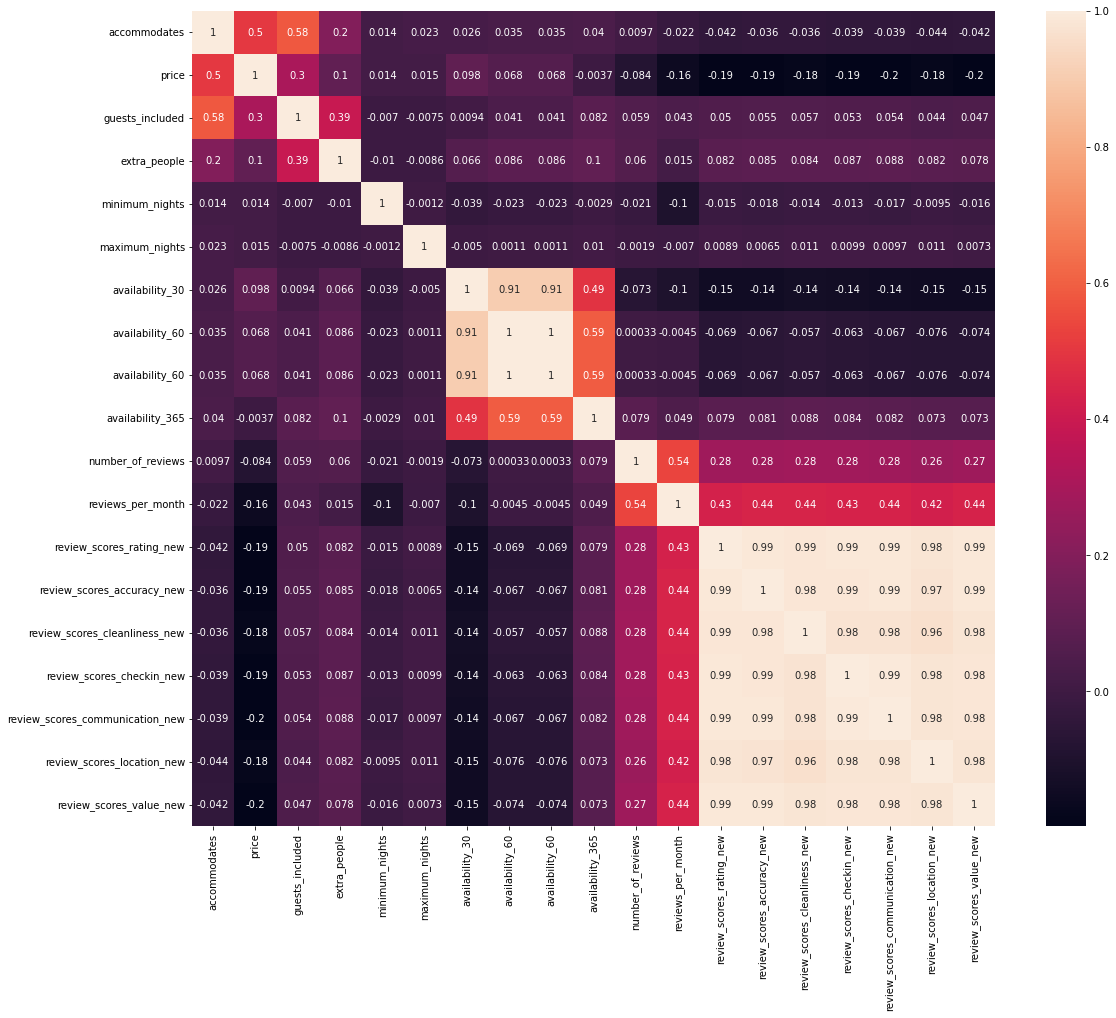

In [43]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(18,15))

# Correlation matrix heatmap
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

### Legend:

Light orange, orange, pink, purple = positive correlations

Dark purple (0) no relationship between the variables

Black = negative correlation

### Insights:

#### Price:
- With “accommodates”: A 0.5 coefficient indicates a medium-to-strong positive correlation. This could be interpreted as “the more guests a listing can accommodate, the higher the price” (likely because the listings are larger) and vice versa — ”the fewer guests a listing can accommodate, the lower the price.” (as they'd be smaller)

#### Review scores (all columns):
- With “price": Coefficients between -0.18 and -0.2 indicate weak negative correlations. This could be interpreted as “the cheaper the listing, the lower review_scores,” (along with its opposite scenarioo).

## 6.2.4 Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

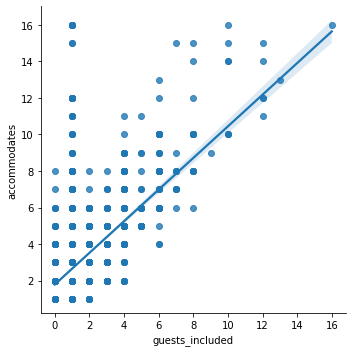

In [44]:
# Create a scatterplot for the "price" and "guests_included" columns in seaborn

sns.lmplot(x = 'guests_included', y = 'accommodates', data = df)

The number of guests that a lising can accommodate and the number of guests that are included in the nightly price have a strong positive relationship of 0.58, evident in the scatterplot above. Should the number of guests included be lower than the number of guests a listing can accommodate, then there will be an extra fee for any additional guests. The number of guests included can never be higher than how many can be accommodated.

## 6.2.5 Create a pair plot of the entire data set.

In [45]:
# Creating another subset with the variables I want to use in the pair plot

sub_2 = sub[['accommodates', 'price', 'number_of_reviews', 'review_scores_rating_new']]

In [46]:
sub_2.head()

,accommodates,price,number_of_reviews,review_scores_rating_new
0,4,160,0,0.0
1,6,350,65,94.0
2,1,50,1,95.0
3,2,95,0,0.0
4,4,50,0,0.0


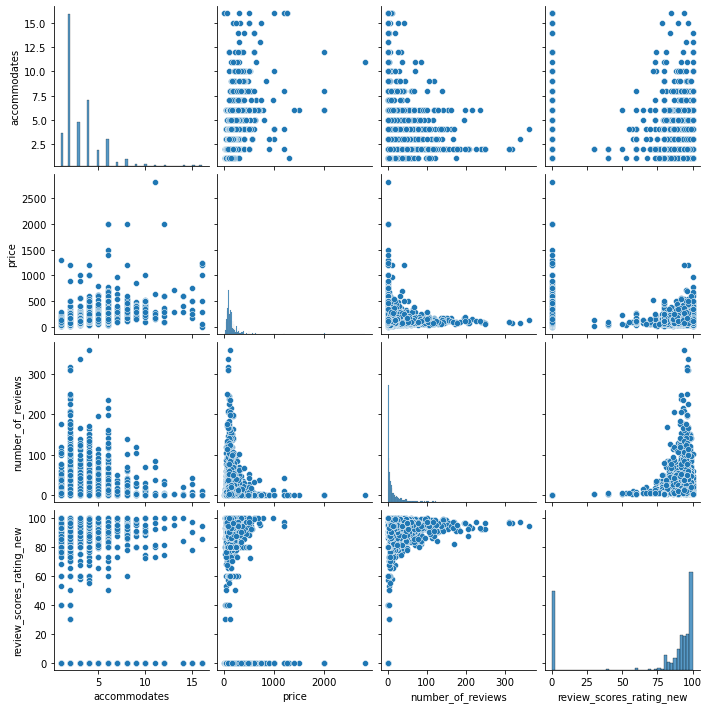

In [54]:
# Creating a pair plot of the second sub set only (entire DF and first subset too large)

g = sns.pairplot(sub_2)

#### Disribution of variables:

The distribution of each variable is heavily skewed, either to the left (accommodates, price and number_of_reviews) or the right (review_scores_rating_new).

I would like to explore all of them further:
- Price: What are listing prices based on location, how many guests can be accommodated and review scores?
- Accommodates: What type of properties can accommodate the most and fewest guests?
- Number of reviews: How does the number of reviews related to the actual review scores?
- Review scores rating: How are ratings spread across location and property type? 

## 6.2.6 Create a categorical plot and interpret the results.

In [47]:
 Duplicates check

,id,host_id,host_listings_count,latitude,longitude,accommodates,price,security_deposit,cleaning_fee,guests_included,...,number_of_reviews,calculated_host_listings_count,reviews_per_month,review_scores_rating_new,review_scores_accuracy_new,review_scores_cleanliness_new,review_scores_checkin_new,review_scores_communication_new,review_scores_location_new,review_scores_value_new
count,3.723000e+03,3.723000e+03,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,...,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000
mean,4.798778e+06,1.497402e+07,13.517325,38.913967,-77.023294,3.195004,149.165995,108.311577,37.452592,1.622079,...,15.306742,3.174590,1.401389,72.614021,7.419286,7.258931,7.549557,7.581252,7.300564,7.252485
std,2.639497e+06,1.351108e+07,64.534408,0.021647,0.026951,2.012216,140.110699,215.605179,46.287302,1.348598,...,29.645586,6.123187,1.728103,39.490809,4.034460,3.996317,4.086965,4.095783,3.988251,3.954152
min,3.192000e+03,1.585000e+03,1.000000,38.825061,-77.110525,1.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.482238e+06,3.433722e+06,1.000000,38.901789,-77.039859,2.000000,85.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.125000,80.000000,8.000000,7.000000,8.000000,8.000000,7.000000,8.000000
50%,5.002566e+06,1.037275e+07,1.000000,38.913375,-77.026410,2.000000,115.000000,0.000000,25.000000,1.000000,...,4.000000,1.000000,0.830000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000
75%,7.148024e+06,2.433087e+07,3.000000,38.926509,-77.002798,4.000000,165.000000,150.000000,55.000000,2.000000,...,16.000000,2.000000,2.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,8.688666e+06,4.555465e+07,480.000000,38.996382,-76.913137,16.000000,2822.000000,3000.000000,400.000000,16.000000,...,362.000000,41.000000,10.980000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:xlabel='reviews_per_month', ylabel='Count'>

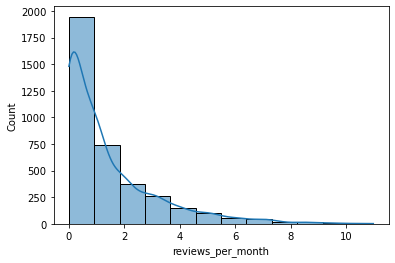

In [48]:
# Create a histogram to visualize the distribution of the variable, in order to determine sensible categories for price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['reviews_per_month'], bins = 12, kde = True)

In [49]:
df.loc[df['reviews_per_month'] < 0.01, 'reviews_per_month_category'] = 'None'

In [50]:
df.loc[(df['reviews_per_month'] >= 0.01) & (df['reviews_per_month'] < 1), 'reviews_per_month_category'] = 'Low'

In [51]:
df.loc[(df['reviews_per_month'] >= 1) & (df['reviews_per_month'] < 4), 'reviews_per_month_category'] = 'Medium'

In [52]:
df.loc[df['reviews_per_month'] >= 4, 'reviews_per_month_category'] = 'High'

In [53]:
df['reviews_per_month_category'].value_counts(dropna = False)

Medium    1363
Low       1191
None       830
High       339
Name: reviews_per_month_category, dtype: int64

In [54]:
# None

830/3723

0.22293849046467903

In [55]:
# Low

1191/3723

0.31990330378726833

In [56]:
# Medium

1363/3723

0.3661026054257319

In [57]:
# High

339/3723

0.09105560032232071

22% of all listings have not yet received any reviews at all. There are 32% of listings that do not receive even one review per month. The majority of listings (37%) receive between 1 and 3 reviews. Finally, 9% of all listings receive between 4 and 11 reviews per month.

In [59]:
# Checking if the new reviews_per_month_category is in the DF

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3723 non-null   int64  
 1   name                              3723 non-null   object 
 2   summary                           3723 non-null   object 
 3   host_id                           3723 non-null   int64  
 4   host_since                        3723 non-null   object 
 5   host_is_superhost                 3723 non-null   object 
 6   host_listings_count               3723 non-null   int64  
 7   host_has_profile_pic              3723 non-null   object 
 8   host_identity_verified            3723 non-null   object 
 9   street                            3723 non-null   object 
 10  neighbourhood_cleansed            3723 non-null   object 
 11  city                              3723 non-null   object 
 12  state 

## 6.2.6 Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

In [60]:
# How many AirBnB listings are in Washington DC (as of the date of the web scrape)?

df.shape

(3723, 50)

There are 3723 listings in Washington DC (on the date of the web scrape).

In [61]:
# What property types are those listings?

df['property_type'].value_counts()

Apartment          2259
House              1210
Condominium          86
Townhouse            70
Bed & Breakfast      55
Loft                 24
Other                12
Boat                  2
Dorm                  2
Bungalow              1
Cabin                 1
N/A                   1
Name: property_type, dtype: int64

There are apartments, houses, condominiums, townhouses, B&Bs, lofts, a couple of boats and dorms, as well as one bungalow and one cabin. 12 are not defined and 1 is not classified.

In [62]:
# How many guests can be accommodated?

df['accommodates'].value_counts()

2     1604
4      690
3      461
1      342
6      279
5      161
8       73
7       35
10      22
9       17
12      12
16       8
11       7
15       6
14       4
13       2
Name: accommodates, dtype: int64

The listings can accommodate between 2 and 13 guests.

In [63]:
# What are the prices?

Prices range from USD10 to USD2822 per night, with an avg. of USD149.

In [64]:
# What is the cancellation policy?

df['cancellation_policy'].value_counts()

flexible           1373
strict             1189
moderate           1099
super_strict_30      62
Name: cancellation_policy, dtype: int64

The cancellation policies can be flexible, moderate, strict or super strict.

## 6.2.8 Define any hypotheses that you can at this point.

If reviews are poor, then prices tend to be lower.

If more guests can be accommodated, the price will be higher.

In [65]:
# Exporting final cleaned dataframe

df.to_csv(os.path.join(path, '02 Data', 'Cleaned', 'listings_cleaned_final.csv'))